PRE PROCESSING

In [ ]:
#1.Read data
import pandas as pd
dfdf =pd.read_csv('/content/e_plane_tee_design (1) (1).csv')
df.shape

(9035, 6)

In [ ]:
# 2. Replace all nan values with the mean value of the feature
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce') # Convert each column to numeric, replace non-numeric with NaN

# Now fill NaN values with the mean
df.fillna(df.mean(), inplace=True)
df

,Frequency output,"S1,1 input","S1,1phase input",Ref input,RefPhase input,
0,7.500,0.296681,18.187322,244.667278,0.0,NaN
1,7.500,0.296681,18.187322,244.667278,0.0,NaN
2,5.000,0.180911,94.056514,244.711240,0.0,NaN
3,5.005,0.180060,93.938822,244.711240,0.0,NaN
4,5.010,0.179188,93.826404,244.711240,0.0,NaN
...,...,...,...,...,...,...
9030,9.980,0.432928,-119.819917,244.579354,0.0,NaN
9031,9.985,0.434275,-120.444957,244.579354,0.0,NaN
9032,9.990,0.435635,-121.069401,244.579354,0.0,NaN
9033,9.995,0.437007,-121.693190,244.579354,0.0,NaN


Before we start let's do the Preprocess to make the data ready for the model.

In [ ]:
#3.Data Cleaning
# Duplicate Removal
def clean_data(df):
    df.drop_duplicates(inplace=True)

    return df
df_cleaned = clean_data(df)
df_cleaned.shape

(7005, 5)

In [ ]:
#4.Scaling and Encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

def scale_and_encode(df_cleaned):

    # 1. Separate numerical and categorical features
    numerical_features = df_cleaned.select_dtypes(include=['number']).columns
    categorical_features = df_cleaned.select_dtypes(include=['object']).columns

    # 2. Scaling (for numerical features)
    # Choose a scaling method (StandardScaler or MinMaxScaler)
    scaler = StandardScaler()  # or MinMaxScaler()
    df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])
df_cleaned.shape


(7005, 5)

In [ ]:
# 5.Convert all columns to numeric if possible, errors='coerce' will replace non-numeric values with NaN
import pandas as pd

def convert_to_numeric(df_cleaned):
    for column in df_cleaned.columns:
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
    return df_cleaned

df_numeric = convert_to_numeric(df_cleaned)

# Inspect the data


In [ ]:
# check that there is no null values through sum of all null values
df_numeric.isnull().sum()

,0
Frequency output,0
"S1,1 input",0
"S1,1phase input",0
Ref input,0
RefPhase input,0


In [ ]:
#let output = column named s1
x = df_numeric.drop(columns=['Frequency output'])
print(x)

y = df_numeric['Frequency output']
print(y)


      S1,1 input  S1,1phase input   Ref input  RefPhase input
0       0.296681        18.187322  244.667278             0.0
2       0.180911        94.056514  244.711240             0.0
3       0.180060        93.938822  244.711240             0.0
4       0.179188        93.826404  244.711240             0.0
5       0.178296        93.719689  244.711240             0.0
...          ...              ...         ...             ...
9030    0.432928      -119.819917  244.579354             0.0
9031    0.434275      -120.444957  244.579354             0.0
9032    0.435635      -121.069401  244.579354             0.0
9033    0.437007      -121.693190  244.579354             0.0
9034    0.438390      -122.316323  244.579354             0.0

[7005 rows x 4 columns]
0        7.500
2        5.000
3        5.005
4        5.010
5        5.015
         ...  
9030     9.980
9031     9.985
9032     9.990
9033     9.995
9034    10.000
Name: Frequency output, Length: 7005, dtype: float64


In [ ]:
print(x.shape)
print(y.shape)

(7005, 4)
(7005,)


1.Random Forest Regressor (Traditional ML):

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid - Changed: Replaced 'auto' with 'sqrt'
param_grid = {
    'n_estimators': [200],          # Number of trees
    'max_depth': [20],          # Maximum depth of the tree
    'min_samples_split': [5],          # Minimum samples to split
    'min_samples_leaf': [2],            # Minimum samples per leaf
    'max_features': ['sqrt']  # Number of features to consider - Changed to 'sqrt'
}

# Predict on the test set
y_pred = grid_search.predict(x_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)
#accuracy = accuracy_score(y_test, y_pred)    #score
#print("Accuracy:", accuracy)


R2 Score: 0.9772539739714902
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score: 0.9826958651357185


Thresholds: [ 5.    6.25  7.5   8.75 10.  ]


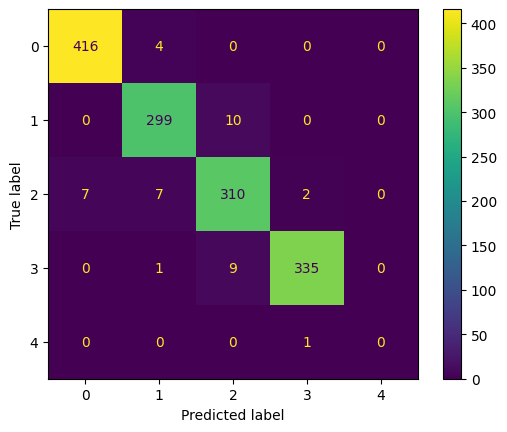

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convert predictions and true values to discrete classes
# You'll need to define appropriate thresholds for discretization

DefineDefineDefineDefineDefineDefineDefineDefineDefineDefineDefineDefine the thresholds (example: breakpoints based on your data range)
thresholds = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 5)  # 5 intervals
print(f"Thresholds: {thresholds}")

y_pred_classes = np.digitize(y_pred, thresholds)
y_test_classes = np.digitize(y_test, thresholds)

# Now create the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()